# Projet ML
GAUD - CURRAL - GALMIER

## Libraries

### Installation

In [65]:
! pip install tensorflow

### Import

In [66]:
import numpy as np
import tensorflow as tf
from glob import glob
from tensorflow import audio

import numpy as np
# import required modules 
import os
import matplotlib.pyplot as plt

### Variables

In [67]:
TEST_DATA_PATH          = 'Data\\test'
TRAIN_DATA_PATH         = 'Data\\train'
VAL_DATA_PATH           = 'Data\\val'

MIN_NUM_FILES           = 160

# Code

In [68]:
import os
#The goal is to sort the bird datasets by number of files to cut the birds with too few files.

birds = []
trainFileNames = []

folders = os.listdir(TRAIN_DATA_PATH)
sorted_folders = sorted(folders, key=lambda folder: len(os.listdir(os.path.join(TRAIN_DATA_PATH, folder))), reverse=True)

for folder in sorted_folders:
    folder_path = os.path.join(TRAIN_DATA_PATH, folder)
    num_files = len(os.listdir(folder_path))
    if num_files > MIN_NUM_FILES:
        birds.append(folder)
        for file in os.listdir(folder_path):
            trainFileNames.append(os.path.join(folder_path, file))



['Common Cuckoo', 'Common Wood Pigeon', 'Spotted Dove', 'House Sparrow', 'House Crow', 'Asian Koel', 'Black Kite', 'Large-billed Crow', 'Grey Treepie', 'Rose-ringed Parakeet', 'Rustic Bunting', 'Rufous Treepie', 'Greater Spotted Eagle', 'Common Pochard', 'Long-tailed Duck', 'Red-billed Blue Magpie', 'Great Slaty Woodpecker', 'Black-necked crane', 'Himalayan Monal', 'Sarus Crane']
['Data\\train\\Common Cuckoo\\XC652380 0.wav', 'Data\\train\\Common Cuckoo\\XC652380 10.wav', 'Data\\train\\Common Cuckoo\\XC652380 11.wav', 'Data\\train\\Common Cuckoo\\XC652380 12.wav', 'Data\\train\\Common Cuckoo\\XC652380 13.wav', 'Data\\train\\Common Cuckoo\\XC652380 15.wav', 'Data\\train\\Common Cuckoo\\XC652380 16.wav', 'Data\\train\\Common Cuckoo\\XC652380 17.wav', 'Data\\train\\Common Cuckoo\\XC652380 18.wav', 'Data\\train\\Common Cuckoo\\XC652380 19.wav', 'Data\\train\\Common Cuckoo\\XC652380 2.wav', 'Data\\train\\Common Cuckoo\\XC652380 20.wav', 'Data\\train\\Common Cuckoo\\XC652380 23.wav', 'Data\\

### Limiting the folders in test

In [69]:
folders = os.listdir(TEST_DATA_PATH)

testFileNames = []

for folder in folders:
    if folder in birds:
        folder_path = os.path.join(TEST_DATA_PATH, folder)
        for file in os.listdir(folder_path):
            testFileNames.append(os.path.join(folder_path, file))

### Limiting the folders in Val

In [70]:
folders = os.listdir(VAL_DATA_PATH)

valFileNames = []

for folder in folders:
    if folder in birds:
        folder_path = os.path.join(VAL_DATA_PATH, folder)
        for file in os.listdir(folder_path):
            valFileNames.append(os.path.join(folder_path, file))

In [71]:
trainFileNames      =   tf.random.shuffle(trainFileNames)
testFileNames       =   tf.random.shuffle(testFileNames)
valFileNames        =   tf.random.shuffle(valFileNames )

In [72]:
firstTrainFile = tf.io.read_file(trainFileNames[0])

In [73]:
test_audio, samplerate = tf.audio.decode_wav(contents=firstTrainFile)

In [74]:
def decode_audio(audio_binary):
    audio, _ = tf.audio.decode_wav(contents=audio_binary)
    return audio

import os

def get_label_from_filepath(file_path):
    parts = tf.strings.split(input=file_path, sep=os.path.sep)
    return parts[-2]

def get_waveform_and_label(file_path):
    label = get_label_from_filepath(file_path)
    audio_binary = tf.io.read_file(file_path)
    waveform = decode_audio(audio_binary)
    waveform = tf.reduce_mean(waveform, axis=1)
    #waveform = tf.squeeze(waveform, axis=-1)
    return waveform, label

code is a function named `decode_audio` that takes in binary audio data and decodes it into a tensor using TensorFlow's audio decoding function.

The function `decode_audio` accepts one parameter, `audio_binary`, which is expected to be the binary data of a WAV audio file.

Inside the function, the `tf.audio.decode_wav` function is called with `audio_binary` as its argument. This function decodes the WAV audio file into a 2D tensor where the first dimension represents the time axis and the second dimension represents the channels. It returns two items: a tensor that contains the decoded audio data and the sample rate of the audio file. In this case, the sample rate is not used, hence it is assigned to `_`, a throwaway variable.


In [75]:
#t = get_label_from_filepath(trainFileNames)

In [76]:
AUTOTUNE = tf.data.AUTOTUNE

The `num_parallel_calls` parameter is set to `AUTOTUNE`, which is a special value that prompts TensorFlow to choose the optimal number of parallel calls dynamically at runtime, based on available CPU resources. This can help improve the speed of loading data.

In [77]:
files_ds = tf.data.Dataset.from_tensor_slices(trainFileNames)


In this case, `trainFileNames` is likely a list or array of file names. The `from_tensor_slices` method takes this list or array and converts it into a dataset of tensor slices. Each tensor slice in the dataset corresponds to an element in the original list or array.

The resulting `files_ds` dataset can then be iterated over, with each iteration yielding one file name from `trainFileNames`. This is useful for loading and preprocessing data in TensorFlow, as it allows you to efficiently and conveniently work with large amounts of data.


In [78]:
waveform_ds = files_ds.map(map_func=get_waveform_and_label, num_parallel_calls=AUTOTUNE)

The line of code you've highlighted is using the `map` function of a TensorFlow `tf.data.Dataset` object, which applies a given function to each element in the dataset.

In this case, the dataset is `files_ds`, which likely contains file names or paths. The function being applied is `get_waveform_and_label`, which is expected to take a file name or path, read the corresponding audio file, and return a waveform and its associated label.

The result of the `map` function is a new dataset, `waveform_ds`, where each element is a waveform-label pair. This dataset can be used for further processing or for training a machine learning model.

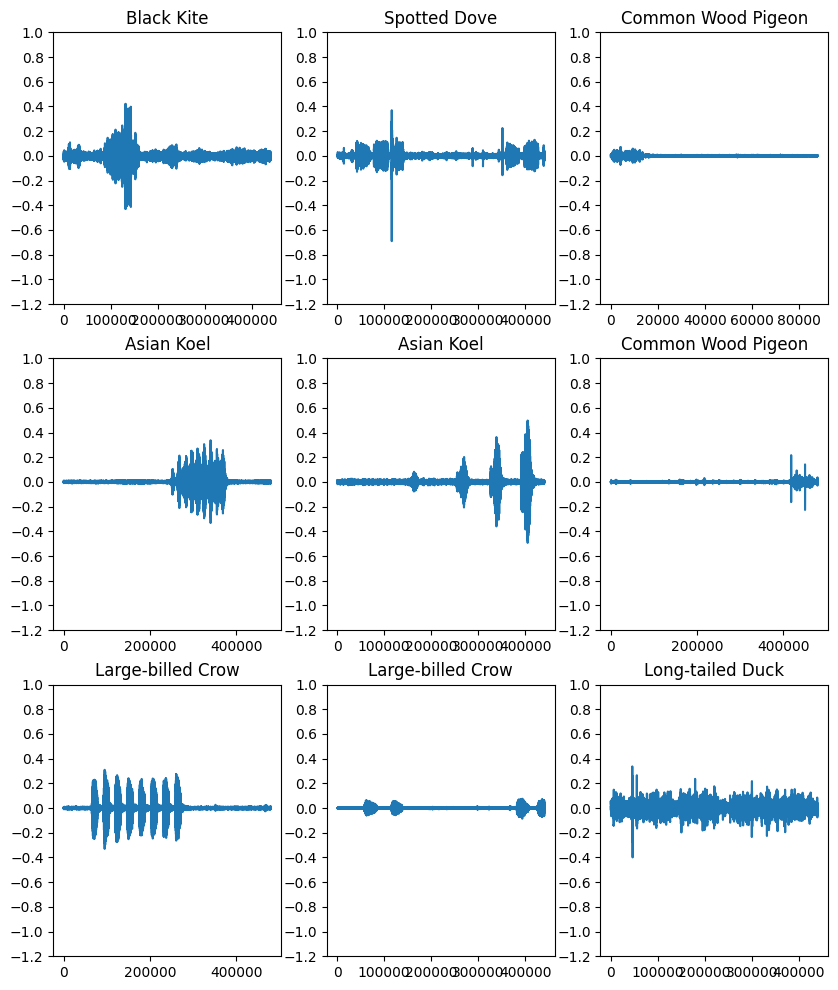

In [79]:
import matplotlib.pyplot as plt
import numpy as np

rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))

for i, (audio, label) in enumerate(waveform_ds.take(n)):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    ax.plot(audio.numpy())
    ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
    label = label.numpy().decode("utf-8")
    ax.set_title(label)

plt.show()

In [80]:
#spectrogram_ds = waveform_ds.map(lambda x, y: (tf.signal.stft(x, frame_length=255, frame_step=128), y))

In [81]:
def get_spectrogram(waveform):
     # Zero-padding for an audio waveform with less than 16,000 samples.
    input_len = 16000
    waveform = waveform[:input_len]
    zero_padding = tf.zeros([16000] - tf.shape(waveform), dtype=tf.float32)

    # Cast the waveform tensors' dtype to float32.
    waveform = tf.cast(waveform, dtype=tf.float32)

    # Concatenate the waveform with `zero_padding`, which ensures all audio
    # clips are of the same length.
    waveform = tf.concat([waveform, zero_padding], 0)

    spectrogram = tf.signal.stft(waveform, frame_length=256, frame_step=128)

    # Obtain the magnitude of the STFT.
    spectrogram = tf.abs(spectrogram)

    # Add a `channels` dimension, so that the spectrogram can be used
    # as image-like input data with convolution layers (which expect
    # shape (`batch_size`, `height`, `width`, `channels`).
    spectrogram = spectrogram[..., tf.newaxis]

    return spectrogram

In [82]:
from IPython import display

for waveform, label in waveform_ds.take(1):
    label = label.numpy().decode("utf-8")
    spectrogram = get_spectrogram(waveform)


In [83]:
def get_spectrogram_and_label_id(audio, label):
    spectrogram = get_spectrogram(audio)
    label_id = tf.argmax(label == birds)
    return spectrogram, label_id

In [84]:
spectrogram_ds = waveform_ds.map(
    map_func=get_spectrogram_and_label_id, num_parallel_calls=AUTOTUNE
)

In [85]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)

  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.

  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]

  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)

  ax.pcolormesh(X, Y, log_spec)


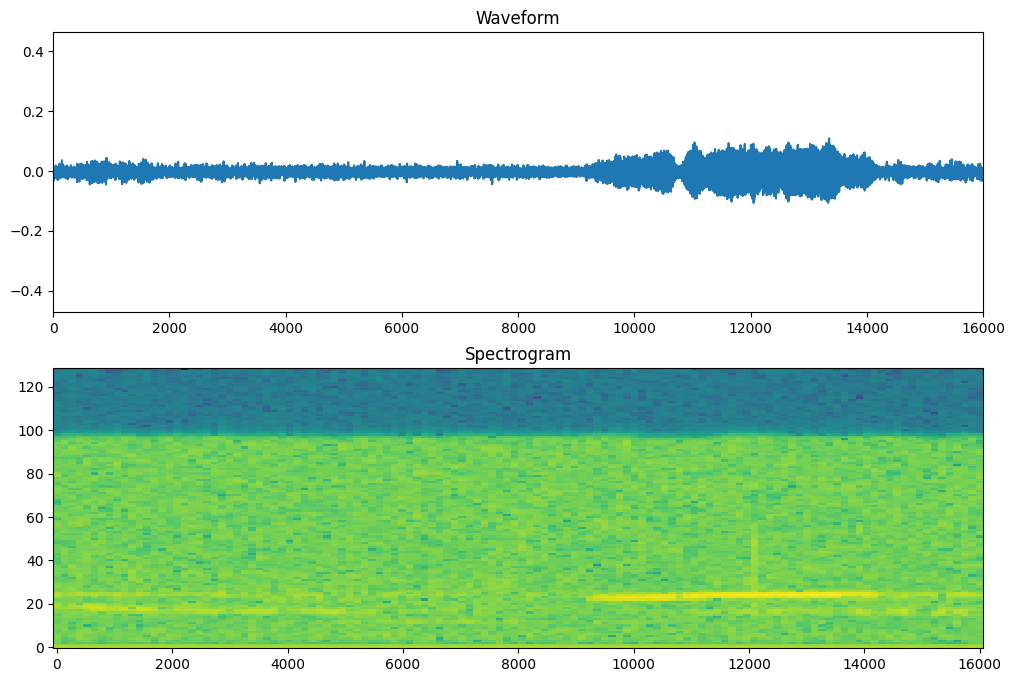

In [86]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title("Waveform")
axes[0].set_xlim([0, 16000])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title("Spectrogram")
plt.show()

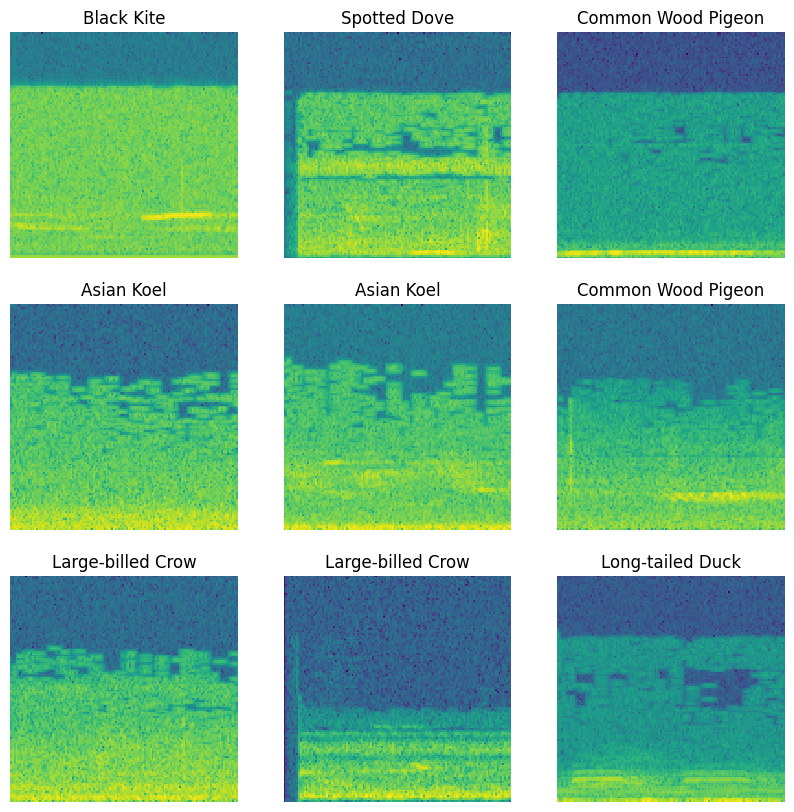

In [87]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

for i, (spectrogram, label_id) in enumerate(spectrogram_ds.take(n)):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    plot_spectrogram(spectrogram.numpy(), ax)
    ax.set_title(birds[label_id.numpy()])
    ax.axis("off")

plt.show()

In [88]:
for spectrogram, _ in spectrogram_ds.take(1):
    input_shape = spectrogram.shape

num_labels = len(birds)


In [89]:
def preprocess_dataset(files):
    files_ds = tf.data.Dataset.from_tensor_slices(files)
    output_ds = files_ds.map(
        map_func=get_waveform_and_label, num_parallel_calls=AUTOTUNE
    )
    output_ds = output_ds.map(
        map_func=get_spectrogram_and_label_id, num_parallel_calls=AUTOTUNE
    )

    return output_ds

In [90]:
train_ds    = spectrogram_ds
val_ds      = preprocess_dataset(valFileNames)
test_ds     = preprocess_dataset(testFileNames)

In [91]:
batch_size      = 64
train_ds        = train_ds.batch(batch_size)
val_ds          = val_ds.batch(batch_size)

In [92]:
train_ds        = train_ds.cache().prefetch(AUTOTUNE)
val_ds          = val_ds.cache().prefetch(AUTOTUNE)